/mnt/OpenFormat/python


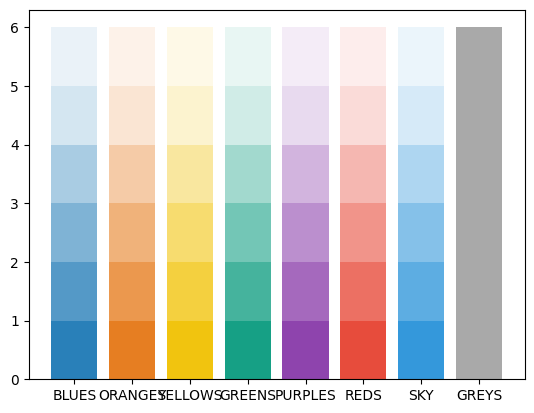

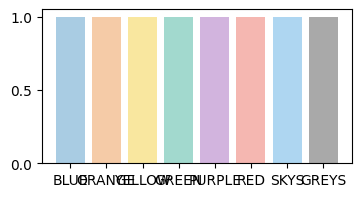

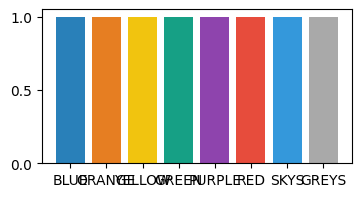

<Figure size 400x200 with 0 Axes>

In [1]:
import json
import os
import sys
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
import matplotlib
from stylelib import *
from process_helper import *
_, grad_colors = display_colors()
_, bar_colors = select_color_idx(2)
_, line_colors = select_color_idx(5)

matplotlib.rcParams.update({'font.size': 14})
dir_path = pathlib.Path(os.path.abspath('')).parent.resolve()
print(dir_path)
HOME_DIR = str(dir_path).split('/OpenFormat')[0]
PROJ_SRC_DIR = f'{HOME_DIR}/OpenFormat'
sys.path.insert(1, f'{PROJ_SRC_DIR}')
from python.scripts.utils import *

# select plot

## separate figures and legend

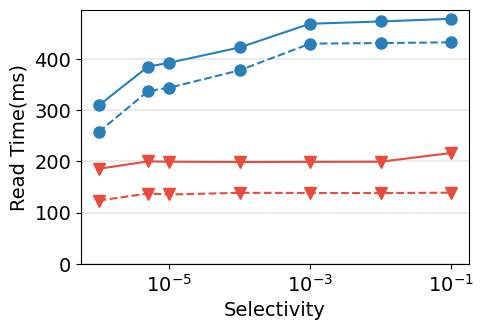

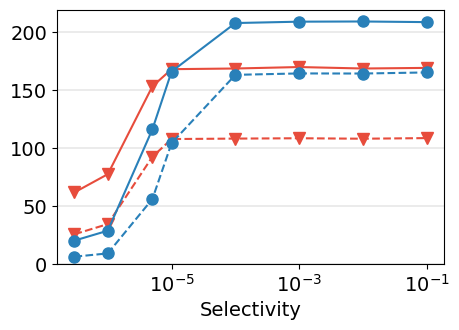

In [6]:
df = pd.read_csv('../outputs/filter_range_col11_eval.csv')

df_low_car = df.groupby(['format', 'proj_type','selectivity'], as_index=False).mean().set_index(['format', 'proj_type'])
# df_hi_car = pd.read_csv('../outputs/filter_range_col9_step1.csv').groupby(['format', 'proj_type','selectivity'], as_index=False).mean().set_index(['format', 'proj_type'])
df_hi_car = pd.read_csv('../outputs/filter_range_col9_eval.csv').groupby(['format', 'proj_type','selectivity'], as_index=False).mean().set_index(['format', 'proj_type'])

for i in range(2):
    fig, ax = plt.subplots(1, 1, figsize=(5, 3.3))
    proj_type = 'one'
    ax.set_xscale('log')
    df_avg = df_low_car if i == 0 else df_hi_car
    ax.plot(df_avg.loc['parquet', proj_type]['selectivity'], df_avg.loc['parquet', proj_type]['time'],color=line_colors[C_PQ],marker="v", label='Parquet',ls='-', ms=8)
    ax.plot(df_avg.loc['parquet', proj_type]['selectivity'], df_avg.loc['parquet', proj_type]['time_preload'],color=line_colors[C_PQ],marker="v", label='Parquet Preload',ls='--', ms=8)
    ax.plot(df_avg.loc['orc', proj_type]['selectivity'], df_avg.loc['orc', proj_type]['time'],color=line_colors[C_ORC],marker="o", label='ORC',ls='-', ms=8)
    ax.plot(df_avg.loc['orc', proj_type]['selectivity'], df_avg.loc['orc', proj_type]['time_preload'],color=line_colors[C_ORC],marker="o", label='ORC Preload',ls='--', ms=8)
    if i == 0:
        ax.set_ylabel("Read Time(ms)", fontsize=14)
        # ax[i].set_title(r"$\bf{(a)}$"+' Low Cardinality Column', fontsize=15, y=-0.38, fontname="Times New Roman")
    # else:
        # ax[i].set_title(r"$\bf{(b)}$"+' High Cardinality Column', fontsize=15, y=-0.38, fontname="Times New Roman")
    ax.set_xlabel('Selectivity')
    ax.set_ylim(bottom=0)
    ax.set_axisbelow(True)
    ax.grid(axis='y', linewidth=0.35)# plt.tight_layout()
    plt.savefig(f'../figures/filterscan{i}.pdf', bbox_inches = 'tight')
    plt.show()
handles, labels = ax.get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper center',bbox_to_anchor=((0.5,1.03)), ncol=4, frameon=False, prop={'size': 14}, columnspacing=1, handletextpad=0.2)
export_legend(legend, "../figures/filterscan_legend.pdf")
legend.remove()

# parquet e2e

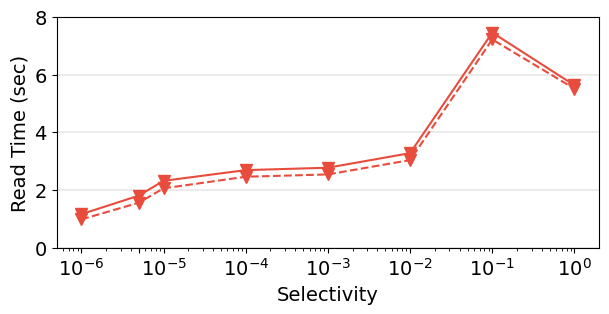

In [7]:
df = pd.read_csv('../outputs/filter_range_pq_e2e.csv')
df_avg = df.groupby(['format', 'proj_type','selectivity'], as_index=False).mean().set_index(['format', 'proj_type'])
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
for i in range(1):
    proj_type = 'all'
    ax.set_xscale('log')
    ax.plot(df_avg.loc['parquet', proj_type]['selectivity'], df_avg.loc['parquet', proj_type]['time']/1000,color=line_colors[C_PQ],marker="v", label='Parquet',ls='-', ms=8)
    ax.plot(df_avg.loc['parquet', proj_type]['selectivity'], df_avg.loc['parquet', proj_type]['time_preload']/1000,color=line_colors[C_PQ],marker="v", label='Parquet Preload',ls='--', ms=8)
    # ax.plot(df_avg.loc['orc', proj_type]['selectivity'], df_avg.loc['orc', proj_type]['time'],color=line_colors[C_ORC],marker="o", label='ORC',ls='-', ms=8)
    # ax.plot(df_avg.loc['orc', proj_type]['selectivity'], df_avg.loc['orc', proj_type]['time_preload'],color=line_colors[C_ORC],marker="o", label='ORC Preload',ls='--', ms=8)
    if i == 0:
        ax.set_ylabel("Read Time (sec)", fontsize=14)
        # ax.set_title('Project All Columns, e2e', fontsize=14)
    else:
        ax.set_title('High Cardinality Column', fontsize=14)
    ax.set_xlabel('Selectivity')
    ax.set_xticks(df_avg.loc['parquet', proj_type]['selectivity'])
    ax.set_ylim(bottom=0, top=8)
    ax.set_axisbelow(True)
    ax.grid(axis='y', linewidth=0.35)
handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center',bbox_to_anchor=((0.5,1.03)), ncol=4, frameon=False, prop={'size': 14}, columnspacing=1, handletextpad=0.2)
# plt.tight_layout()
plt.savefig(f'../figures/filterscan_e2e.pdf', bbox_inches = 'tight')
plt.show()